**Objective :** *Develop an image classification model to distinguish between the images of cats and dogs using data science techniques.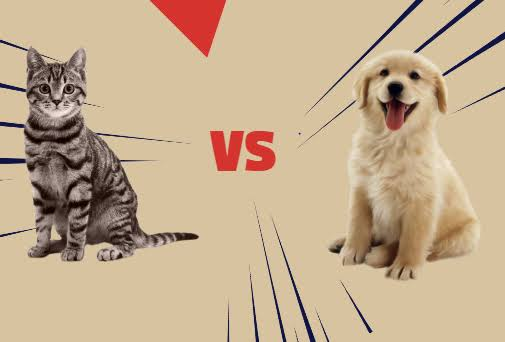*

**Loading dataset from kaggle.com**

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip the downloaded file.
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


**Loading required libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import matplotlib.pyplot as plt


In [ ]:
# Generate data batches

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize the data
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create Model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 104ms/step - loss: 0.6251 - accuracy: 0.6536 - val_loss: 0.5481 - val_accuracy: 0.7080
Epoch 2/10
625/625 [==============================] - 59s 93ms/step - loss: 0.4889 - accuracy: 0.7620 - val_loss: 0.5000 - val_accuracy: 0.7570
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3822 - accuracy: 0.8237 - val_loss: 0.4838 - val_accuracy: 0.7898
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2642 - accuracy: 0.8864 - val_loss: 0.6127 - val_accuracy: 0.7800
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1544 - accuracy: 0.9388 - val_loss: 0.7948 - val_accuracy: 0.7854
Epoch 6/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1029 - accuracy: 0.9617 - val_loss: 1.1001 - val_accuracy: 0.7790
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0692 - accuracy: 0.9747 - val_loss: 1.1159 - val_accuracy

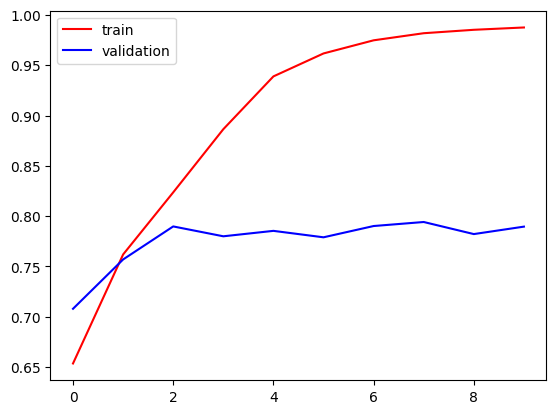

In [ ]:
# plotting training and validation accuracy

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


Above graph indicate the overfitting in model. Thus, Let's try to fix it.

In [ ]:
# Creating Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 109ms/step - loss: 0.8292 - accuracy: 0.6342 - val_loss: 0.5844 - val_accuracy: 0.6872
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5131 - accuracy: 0.7539 - val_loss: 0.5597 - val_accuracy: 0.7188
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4110 - accuracy: 0.8166 - val_loss: 0.5191 - val_accuracy: 0.7694
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3172 - accuracy: 0.8636 - val_loss: 0.4125 - val_accuracy: 0.8320
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2356 - accuracy: 0.9007 - val_loss: 0.3273 - val_accuracy: 0.8574
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1696 - accuracy: 0.9323 - val_loss: 0.3123 - val_accuracy: 0.8734
Epoch 7/10
625/625 [==============================] - 70s 112ms/step - loss: 0.1171 - accuracy: 0.9541 - val_loss: 0.3372 - val_ac

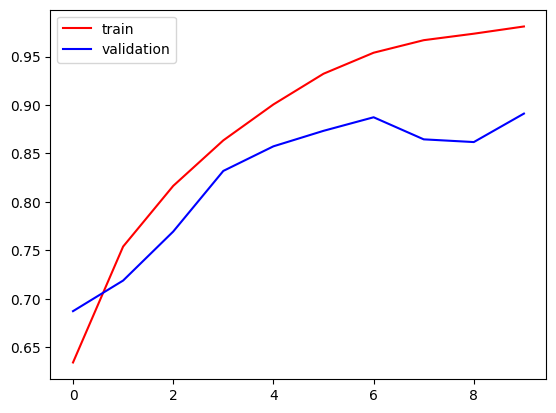

In [ ]:
# plotting training and validation accuracy

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


*Model has been trained well with validation accuracy of 89.12 %*

**Prediction on unseen data**

In [ ]:
import cv2

cat_img= cv2.imread('/content/cat.jpg')

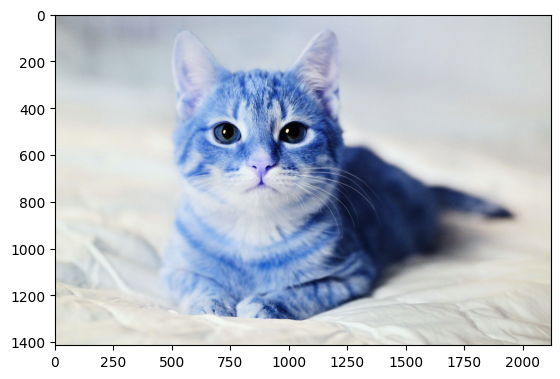

In [ ]:
plt.imshow(cat_img)

In [ ]:
cat_img.shape

(1414, 2121, 3)

In [ ]:
cat_img= cv2.resize(cat_img,(256,256))

In [ ]:
test_input = cat_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [ ]:
dog_img= cv2.imread('/content/dog.jpg')

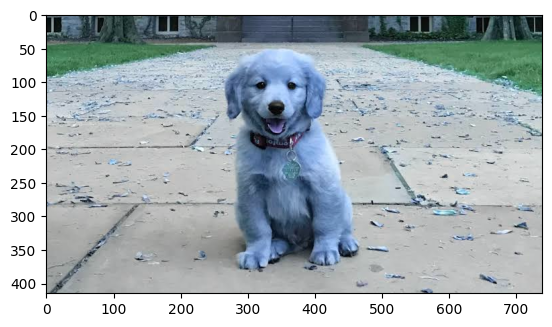

In [ ]:
plt.imshow(dog_img)

In [ ]:
dog_img.shape

(415, 739, 3)

In [ ]:
dog_img= cv2.resize(dog_img,(256,256))

In [ ]:
test_input = dog_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 38ms/step


array([[1.]], dtype=float32)

*   *Output 0 = Cat*
*   *Output 1 = Dog*

